In [353]:
# import basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [354]:
# read csv
df = pd.read_csv('../data/data_clean_nlp.csv')

In [355]:
# check data
df.head()

,channel_name,user,real_name,text,text_length,reply_count,reply_users_count,replies_true,day_name,day_type,...,files_true,link_of_attachments,attachments_true,reaction_true,tb_Pol,tb_Subj,compound,neg,neu,pos
0,general,U01S79YDELR,Karina Condeixa,hang told add education,35,0,0,False,Sunday,Weekend,...,False,nolink,False,False,0.00000,0.000000,0.0000,0.000,1.000,0.000
1,general,U01S79YDELR,Karina Condeixa,improved score adding metrics achievements usi...,98,0,0,False,Sunday,Weekend,...,False,nolink,False,False,0.00000,0.000000,0.6908,0.000,0.695,0.305
2,general,U01RRV4JX6Z,Francisco Ebeling,feel like slave dumb resume worded algorithm s...,261,31,2,True,Sunday,Weekend,...,False,nolink,False,False,-0.04881,0.445068,-0.4363,0.153,0.760,0.086
3,general,U01S79YDELR,Karina Condeixa,francisco remove fancybeautiful format upload,76,0,0,False,Sunday,Weekend,...,False,nolink,False,False,0.00000,0.000000,0.0000,0.000,1.000,0.000
4,general,U01RRV4JX6Z,Francisco Ebeling,ah ok,7,0,0,False,Sunday,Weekend,...,False,nolink,False,False,0.62500,0.500000,0.0000,0.000,1.000,0.000


In [356]:
df.dtypes

channel_name            object
user                    object
real_name               object
text                    object
text_length              int64
reply_count              int64
reply_users_count        int64
replies_true              bool
day_name                object
day_type                object
time                    object
dayparts                object
day_number               int64
month                   object
reactions_count          int64
reactions_name          object
link_of_file            object
files_true                bool
link_of_attachments     object
attachments_true          bool
reaction_true             bool
tb_Pol                 float64
tb_Subj                float64
compound               float64
neg                    float64
neu                    float64
pos                    float64
dtype: object

In [357]:
# make a copy
df_copy = df.copy()

### Logistic Regression

In [358]:
# split numerical and categorical data into two dataframes
df_num = df.select_dtypes(include=['number'])
df_num.head()

,text_length,reply_count,reply_users_count,day_number,reactions_count,tb_Pol,tb_Subj,compound,neg,neu,pos
0,35,0,0,9,0,0.00000,0.000000,0.0000,0.000,1.000,0.000
1,98,0,0,9,0,0.00000,0.000000,0.6908,0.000,0.695,0.305
2,261,31,2,9,0,-0.04881,0.445068,-0.4363,0.153,0.760,0.086
3,76,0,0,9,0,0.00000,0.000000,0.0000,0.000,1.000,0.000
4,7,0,0,9,0,0.62500,0.500000,0.0000,0.000,1.000,0.000


In [359]:
df_num.drop(['day_number'], axis=1, inplace=True)
df_num.head()

/Users/lilmac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,text_length,reply_count,reply_users_count,reactions_count,tb_Pol,tb_Subj,compound,neg,neu,pos
0,35,0,0,0,0.00000,0.000000,0.0000,0.000,1.000,0.000
1,98,0,0,0,0.00000,0.000000,0.6908,0.000,0.695,0.305
2,261,31,2,0,-0.04881,0.445068,-0.4363,0.153,0.760,0.086
3,76,0,0,0,0.00000,0.000000,0.0000,0.000,1.000,0.000
4,7,0,0,0,0.62500,0.500000,0.0000,0.000,1.000,0.000


In [360]:
# split numerical and categorical data into two dataframes
df_cat = df.select_dtypes(include=['object', 'bool'])
df_cat.head()

,channel_name,user,real_name,text,replies_true,day_name,day_type,time,dayparts,month,reactions_name,link_of_file,files_true,link_of_attachments,attachments_true,reaction_true
0,general,U01S79YDELR,Karina Condeixa,hang told add education,False,Sunday,Weekend,08:00,Morning,May,0,nofile,False,nolink,False,False
1,general,U01S79YDELR,Karina Condeixa,improved score adding metrics achievements usi...,False,Sunday,Weekend,08:01,Morning,May,0,nofile,False,nolink,False,False
2,general,U01RRV4JX6Z,Francisco Ebeling,feel like slave dumb resume worded algorithm s...,True,Sunday,Weekend,15:27,Afternoon,May,0,nofile,False,nolink,False,False
3,general,U01S79YDELR,Karina Condeixa,francisco remove fancybeautiful format upload,False,Sunday,Weekend,15:30,Afternoon,May,0,nofile,False,nolink,False,False
4,general,U01RRV4JX6Z,Francisco Ebeling,ah ok,False,Sunday,Weekend,15:32,Afternoon,May,0,nofile,False,nolink,False,False


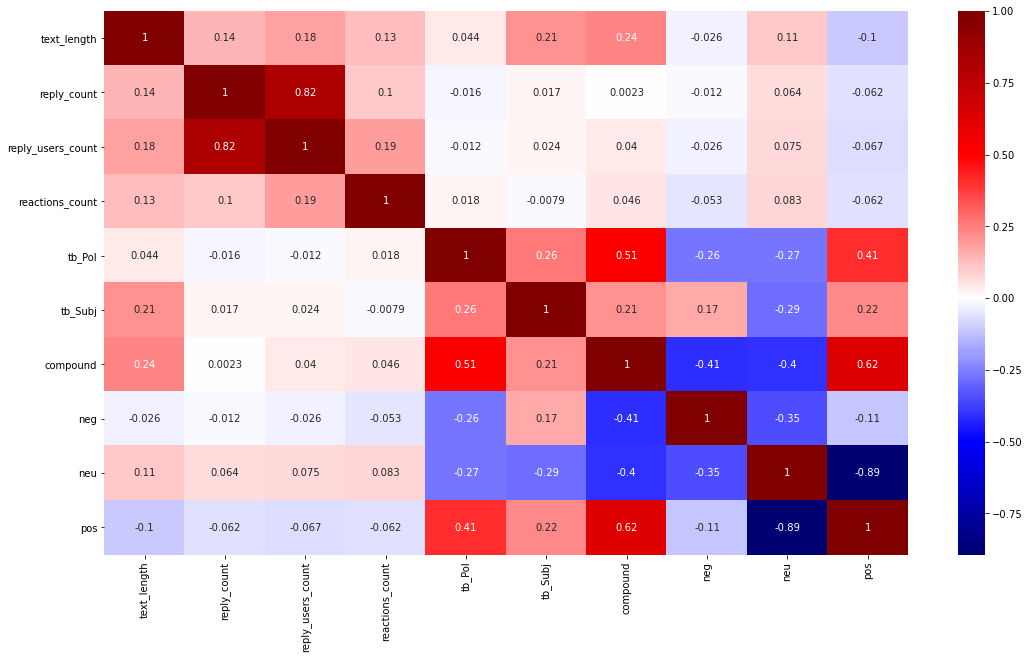

In [361]:
#correlation for numerial columns
corr_matrix = df_num.corr()
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corr_matrix, cmap ='seismic', center = 0, annot=True);

In [362]:
#normalizer
import numpy as np
from sklearn.preprocessing import Normalizer
X = df_num

In [363]:
#check X
X.head(5)

,text_length,reply_count,reply_users_count,reactions_count,tb_Pol,tb_Subj,compound,neg,neu,pos
0,35,0,0,0,0.00000,0.000000,0.0000,0.000,1.000,0.000
1,98,0,0,0,0.00000,0.000000,0.6908,0.000,0.695,0.305
2,261,31,2,0,-0.04881,0.445068,-0.4363,0.153,0.760,0.086
3,76,0,0,0,0.00000,0.000000,0.0000,0.000,1.000,0.000
4,7,0,0,0,0.62500,0.500000,0.0000,0.000,1.000,0.000


In [364]:
# normalize and transform
transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)

In [365]:
# concat variables into X df
X = pd.DataFrame(x_normalized, columns=X.columns)

In [366]:
X_cols = X.columns

In [367]:
#check columns to copy into cat dataframe
df_cat.columns

Index(['channel_name', 'user', 'real_name', 'text', 'replies_true', 'day_name',
       'day_type', 'time', 'dayparts', 'month', 'reactions_name',
       'link_of_file', 'files_true', 'link_of_attachments', 'attachments_true',
       'reaction_true'],
      dtype='object')

In [368]:
#encoding categorical features
cat = pd.get_dummies(df_cat, columns=['files_true', 'replies_true', 'attachments_true', 
                                      'reaction_true', 'dayparts', 
                                      'channel_name', 'month'], drop_first = True)

In [369]:
# drop customer_number column
cat.drop(['real_name', 'text','day_type', 'user', 'day_name', 'reactions_name',
          'time', 'link_of_file', 'link_of_attachments'], axis=1, inplace=True)

In [370]:
#test cat df
cat

,files_true_True,replies_true_True,attachments_true_True,reaction_true_True,dayparts_Early Morning,dayparts_Evening,dayparts_Late Night,dayparts_Morning,dayparts_Night,channel_name_dmemes,...,channel_name_frustrations,channel_name_funcommittee,channel_name_general,channel_name_katas,channel_name_labhelp,channel_name_music,channel_name_random,channel_name_vanilla,month_March,month_May
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4936,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4938,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [371]:
# dropping the reaction_true column as that's what we wanna predict
cat_clean = cat.drop(['reaction_true_True'], axis=1)

In [372]:
# defining the target y
y = cat['reaction_true_True']

In [373]:
#checking the len of x_normalized & cat_clean before merginf back together in X
len(x_normalized), len(y), len(df)

(4940, 4940, 4940)

In [374]:
# bring the numerical data (scaled)in with the categorical
X = np.concatenate((x_normalized, cat_clean),axis=1)

In [375]:
#test
X

array([[0.99959209, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.99994517, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.99298421, 0.11794065, 0.00760907, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.99970269, 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.99950654, 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.99999356, 0.00184501, 0.00184501, ..., 1.        , 0.        ,
        0.        ]])

In [376]:
#import model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [377]:
#train test split - splitting X and y each into 2 data sets(train data and test data)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.4, random_state=40)

In [378]:
#model development
#create a Logistic Regression classifier (classification) object using LogisticRegression() function
#fit model on the train set using fit()

classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X_train, y_train)

In [379]:
#perform prediction on the test set using predict()
from sklearn.metrics import accuracy_score 
predictions = classification.predict(X_test)

In [380]:
#check the predictions array
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [381]:
#calculating the accuracy score
accuracy_score(y_test, predictions)

0.8188259109311741

In [382]:
#defining the confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
cnf_matrix

array([[1503,    8],
       [ 350,  115]])

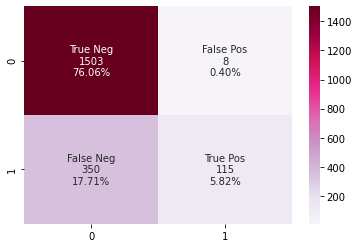

In [383]:
#visualizing the confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='PuRd');

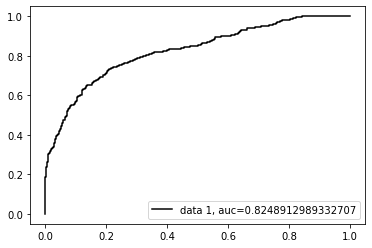

In [384]:
#visualising the ROC and AUC
y_pred_proba = classification.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc), color='k')
plt.legend(loc=4)
plt.show()

### Linear Regression

In [385]:
#import the model
from sklearn import linear_model
#import evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

In [386]:
df_num

,text_length,reply_count,reply_users_count,reactions_count,tb_Pol,tb_Subj,compound,neg,neu,pos
0,35,0,0,0,0.000000,0.000000,0.0000,0.000,1.000,0.000
1,98,0,0,0,0.000000,0.000000,0.6908,0.000,0.695,0.305
2,261,31,2,0,-0.048810,0.445068,-0.4363,0.153,0.760,0.086
3,76,0,0,0,0.000000,0.000000,0.0000,0.000,1.000,0.000
4,7,0,0,0,0.625000,0.500000,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...
4935,21,0,0,0,0.200000,0.200000,0.5228,0.000,0.471,0.529
4936,82,0,0,0,0.000000,0.000000,0.0000,0.000,1.000,0.000
4937,41,0,0,0,0.000000,0.000000,0.0000,0.000,1.000,0.000
4938,45,0,0,1,0.000000,0.000000,0.0000,0.000,1.000,0.000


In [387]:
#first, we define the y or dependent variable we are seeking to predict (our label)
y = df_num['reactions_count']
#then we drop that column from the list of remaining columns (features) that we will feed into our model 
X = df_num.drop(['reactions_count', 'tb_Pol', 'compound'], axis=1)
#we define the model we will use - in this case LR
lm = linear_model.LinearRegression()


In [388]:
#next, is the simple bit - all we do is fit the model to our data 
model = lm.fit(X,y)
#then we can calculate a score 
lm.score(X,y)

0.059012420712530655

In [389]:
#Now we have our first imperfect iteration or It1 

predictions  = lm.predict(X)

In [390]:
r2_score(y, predictions)

0.059012420712530655

In [391]:
lm.intercept_

-9.15645321041446

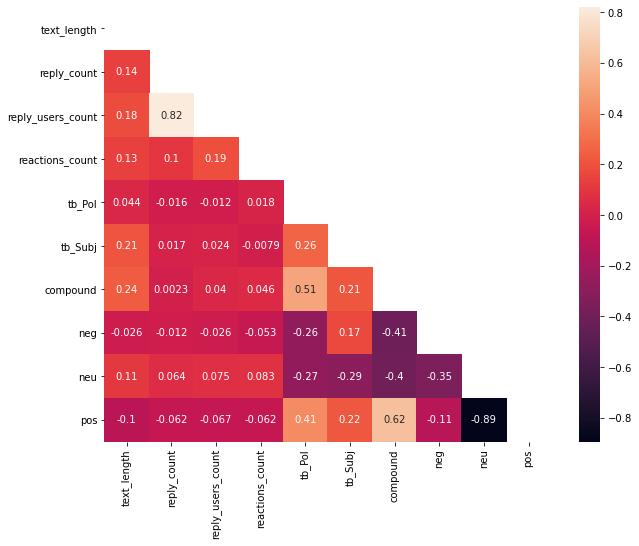

In [392]:
correlations_matrix = df_num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

/Users/lilmac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


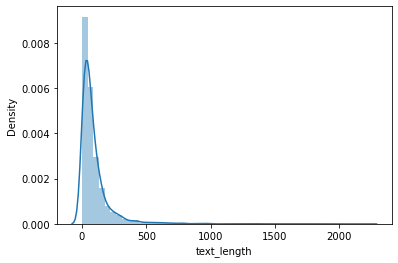

In [393]:
sns.distplot(df_num['text_length'])
plt.show()

<AxesSubplot:xlabel='text_length'>

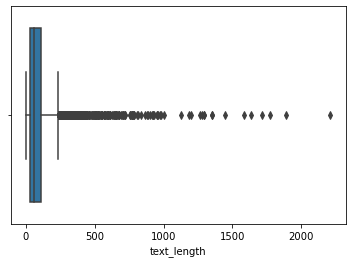

In [394]:
sns.boxplot(x=df_num['text_length'])

In [395]:
#remove outliers using calculated IQRs 

iqr = np.percentile(df_num['text_length'],75) - np.percentile(df_num['text_length'],25)
upper_limit = np.percentile(df_num['text_length'],75) + 1.5*iqr
lower_limit = np.percentile(df_num['text_length'],25) - 1.5*iqr

df_num = df_num[(df_num['text_length']>lower_limit) & (df_num['text_length']<upper_limit)]

/Users/lilmac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


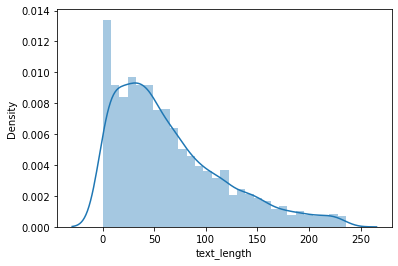

In [396]:
sns.distplot(df_num['text_length'])
plt.show()

/Users/lilmac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


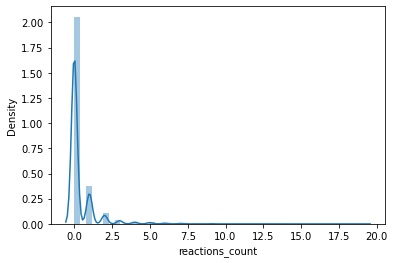

In [397]:
sns.distplot(df_num['reactions_count'])
plt.show()

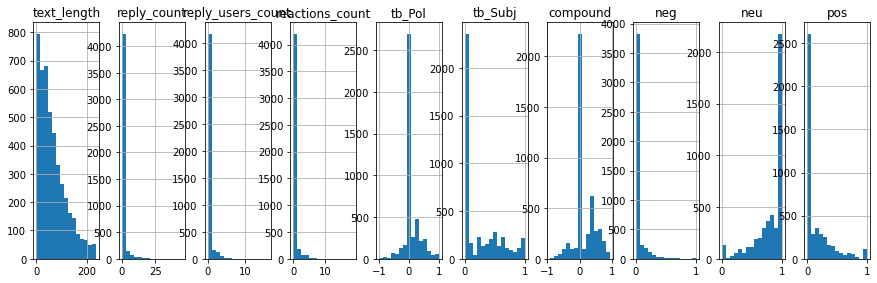

In [398]:
#all histograms 
df_num.hist(bins=15, figsize=(15, 10), layout=(2, 10));

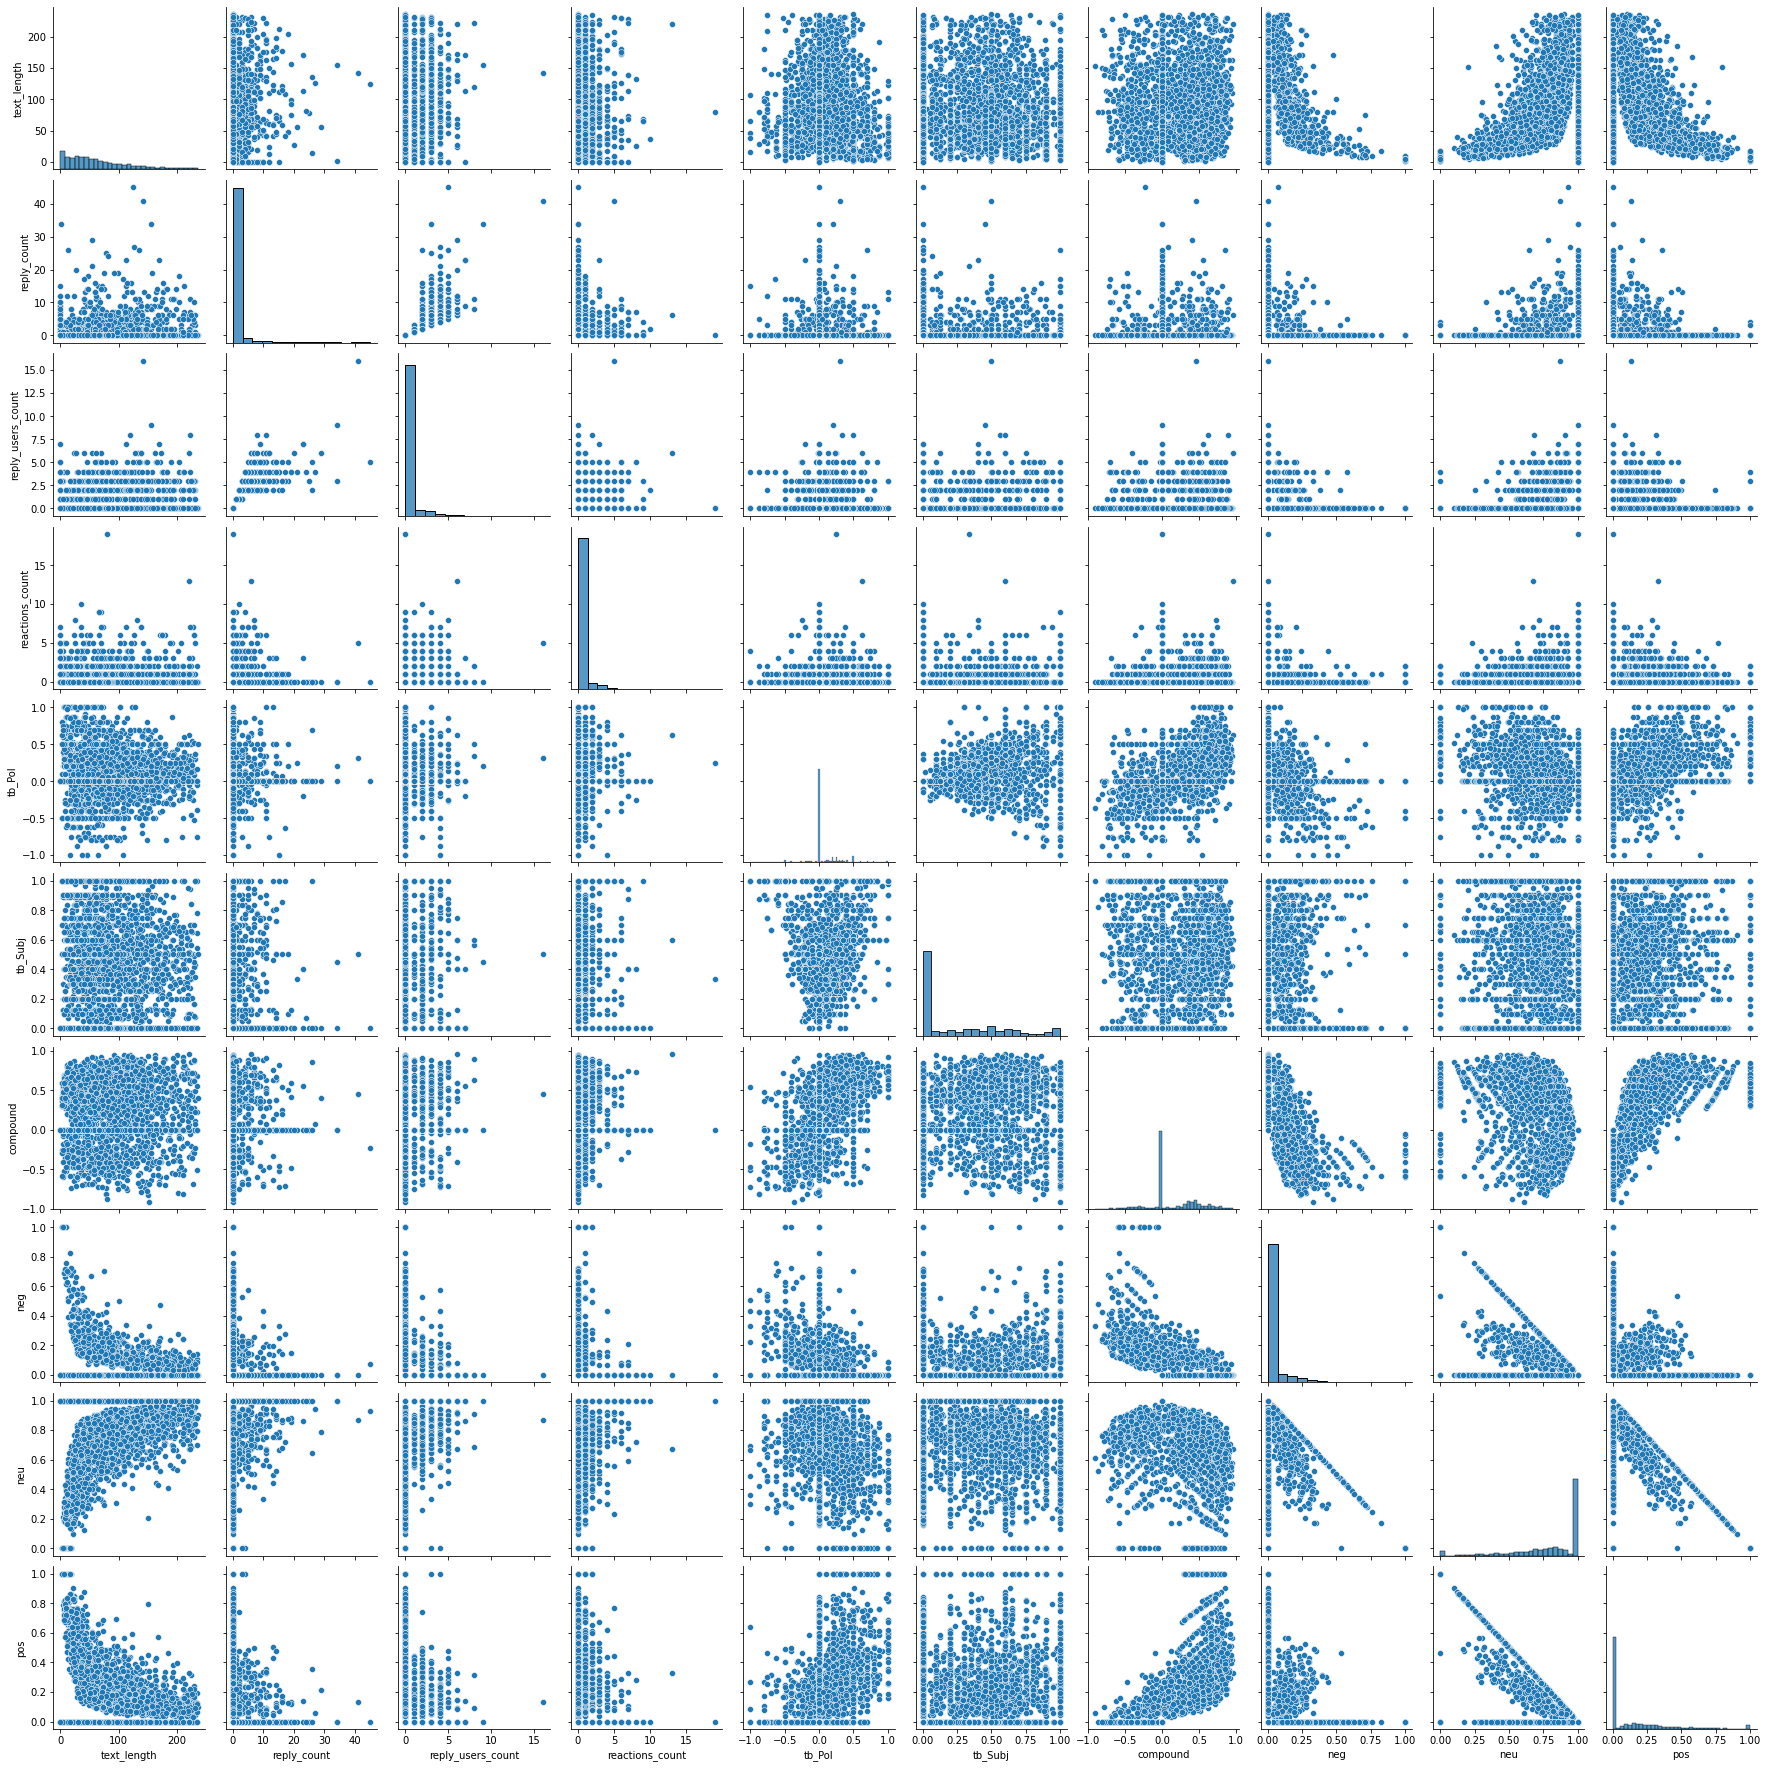

In [399]:
# all scatter plots as a matrix
sns.pairplot(df_num)

In [400]:
X_cat = cat

In [401]:
#option 1 using OHE 
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [402]:
#option 2 standardising all numeric features / rescaling using Standard Scaler
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X)
x_standardized = transformer.transform(X)
print(x_standardized.shape)

(4940, 7)


In [403]:
#step 6 bring the X data back together 
X = np.concatenate((x_standardized, encoded), axis=1)
# we did this already : y = data['TARGET_D']

In [404]:
X_cat.shape
#check the shape of the array

(4940, 23)

In [405]:
y.shape
#check the shape of the array - both X and y should have the same no of rows 

(4940,)

In [406]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [407]:
#step 7 split the data into train and test randomly, as a %
from sklearn.model_selection import train_test_split

In [408]:
#step 8 apply the machine learn model for It3 
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r2_score(y_test, predictions)

0.5454168773688396

In [409]:
mse = mean_squared_error(y_test, predictions)
print(mse)

0.5314539667286499


In [410]:
import math 
rmse = math.sqrt(mse)
print(rmse)

0.7290088934496272


In [411]:
r2 = r2_score(y_test, predictions)
r2

0.5454168773688396